<h1>Bài 3 _ Thực hành

<H3>Import các thư viện cần thiết

In [74]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn import metrics

import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline

<h3>1.	Nhập dữ liệu, thống kê các thông tin cơ bản, xử lý dữ liệu bị thiếu.

In [75]:
df = pd.read_csv("E:\\IS252\\Lab5\\data\\Mall_Customers.csv")

<li>Xem 12 dòng dữ liệu đầu

In [76]:
df.head(12)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


<li>Trả thông tin của những column

In [77]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<li>Kiểm tra dữ liệu

In [78]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1=df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1,1)).sort_values(ascending = False)
missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','%'])
missing_data.head(5)

,Total,%
CustomerID,0,0.0
Gender,0,0.0
Age,0,0.0
Annual Income (k$),0,0.0
Spending Score (1-100),0,0.0


<P><strong>Kết luận: </strong>không có dữ liệu trống</p>

<h3>2.	Sử dụng biểu đồ tần suất (Histogram) để biểu diễn phân phối của lần lượt các thuộc tính Tuổi, Thu nhập hằng năm và Số điểm mua sắm.

C:\Users\phuon\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\phuon\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\phuon\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hi

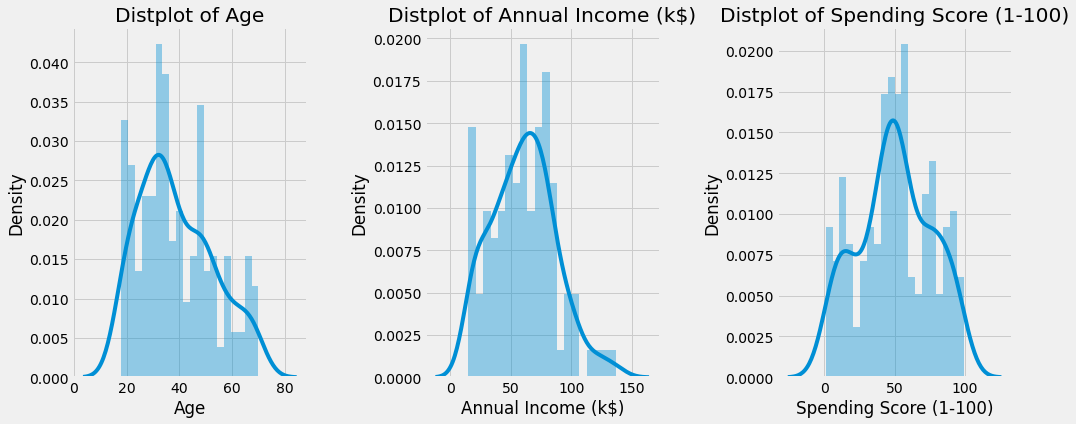

In [79]:
plt.style.use('fivethirtyeight')

plt.figure(1,figsize =(15,6))
n = 0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace =0.5,wspace=0.5)
    sns.distplot(df[x],bins = 20)
    plt.title('Distplot of {}'.format(x))
    
plt.show()

<li>Dựa vào biểu đồ Age ta thấy độ tuổi 40 chiếm nhiều nhất
<li>Dựa vào biểu đồ Annual Income (k$) với giá trị 50 -60 chiếm nhiều nhất
<li>Dựa vào biểu đồ Spending Score (1-100) với giá trị điểm 50 chiếm nhiều nhất 


<h3>3.	Thống kê số mẫu dữ liệu theo thuộc tính Giới tính.

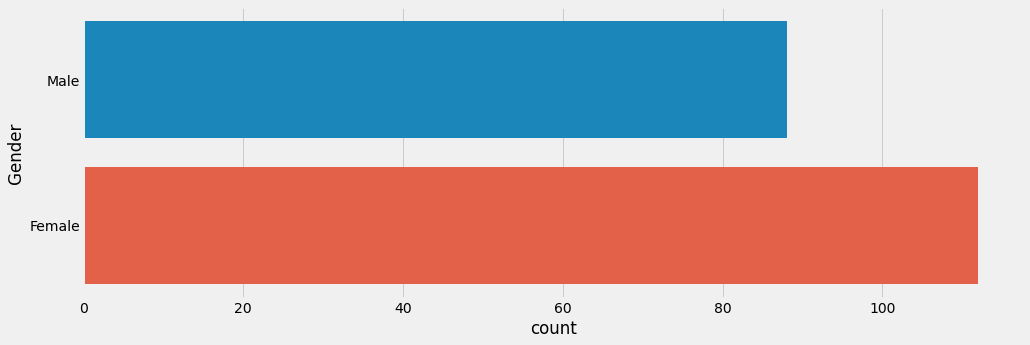

In [80]:
plt.figure(1,figsize=(15,5))
sns.countplot(y = 'Gender',data =df)
plt.show()

<li>Số lượng mẫu giới tính nữ (Female) nhiều hơn giới tính nam (Male)

<h4>4.		Sử dụng biểu đồ phân tán (Scatter plot) để khảo sát phân bố của thuộc tính Tuổi và Thu nhập hằng năm theo Giới tính.

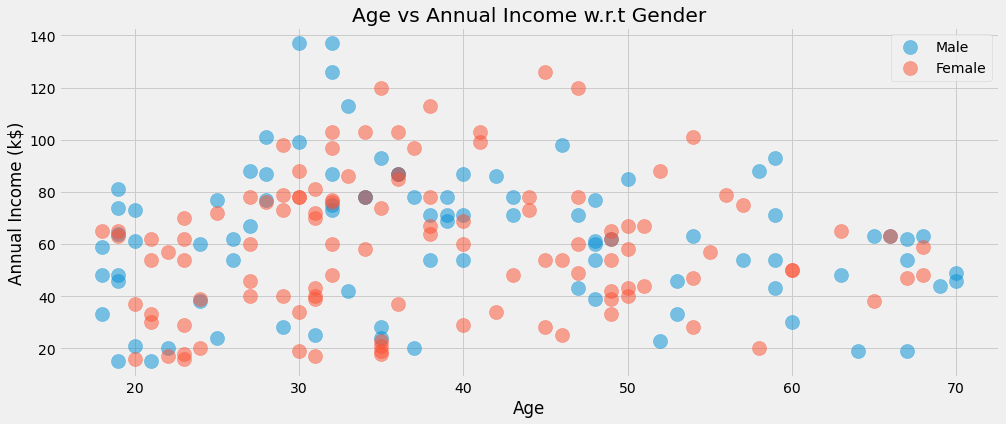

In [81]:
plt.figure(1, figsize = (15, 6))
for gender in ['Male', 'Female']:
    plt.scatter(x = 'Age', y = 'Annual Income (k$)', data = df[df['Gender'] == gender], 
                s = 200, alpha = 0.5, label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

<h3>5.	Tương tự câu 4, khảo sát thuộc tính Thu nhập hằng năm và Số điểm mua sắm theo Giới tính.

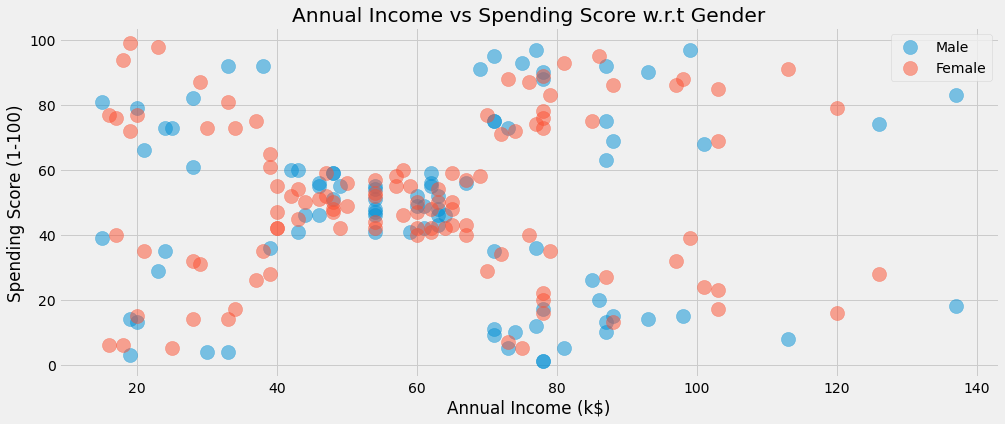

In [82]:
plt.figure(1, figsize = (15, 6))
for gender in ['Male', 'Female']:
    plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df[df['Gender'] == gender], 
                s = 200, alpha = 0.5, label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()


<h3>6.	Chọn thuộc tính Tuổi và Số điểm mua sắm để gom cụm. Sử dụng phương pháp khuỷu tay (ELBOW method) để xác định số cụm cần thiết. Tiến hành gom cụm bằng thuật toán k-Means với số cụm vừa xác định.

In [83]:
X1 = df[['Age', 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1, 11):
    algorithm = KMeans(n_clusters = n, init = 'random')
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

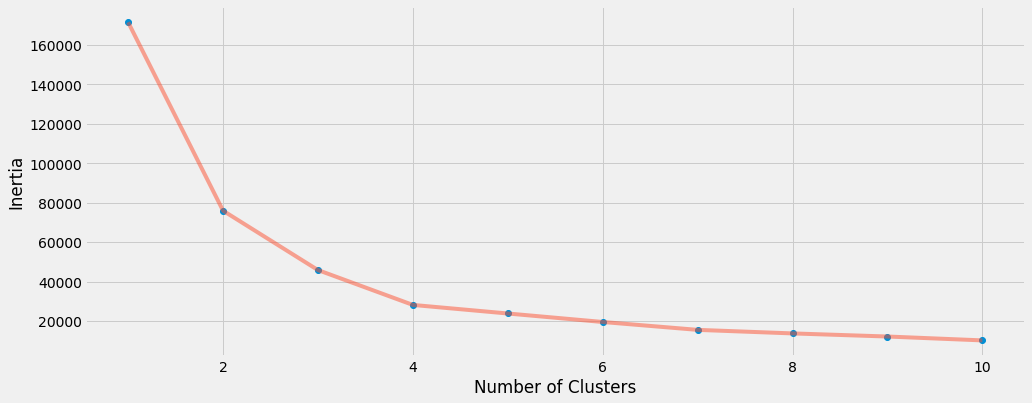

In [84]:
plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

In [85]:
algorithm = KMeans(n_clusters = 4, init = 'random')
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

<h3>7.	Biểu diễn kết quả gom cụm trên bằng biểu đồ.

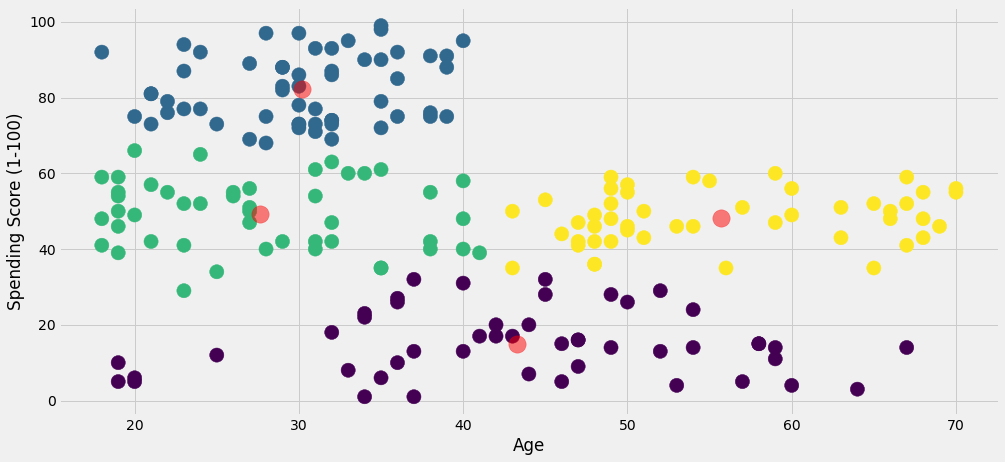

In [86]:
plt.figure(1, figsize = (15, 7))
plt.clf()
plt.scatter(x = 'Age', y = 'Spending Score (1-100)', data = df, c = labels1, s = 200)
plt.scatter(x = centroids1[: , 0], y = centroids1[: , 1], s =300, c = 'red', alpha = 0.5)
plt.ylabel('Spending Score (1-100)'), plt.xlabel('Age')
plt.show()

In [87]:
metrics.silhouette_score(X1, labels1, metric = 'euclidean')

0.49973941540141753

<h3>9.	Thực hiện tương tự câu 6-8 với trường hợp gom cụm theo các thuộc tính:

<li>Thu nhập hằng năm và Số điểm mua sắm.

In [88]:

X2 = df[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1, 11):
    algorithm = KMeans(n_clusters = n, init = 'random')
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

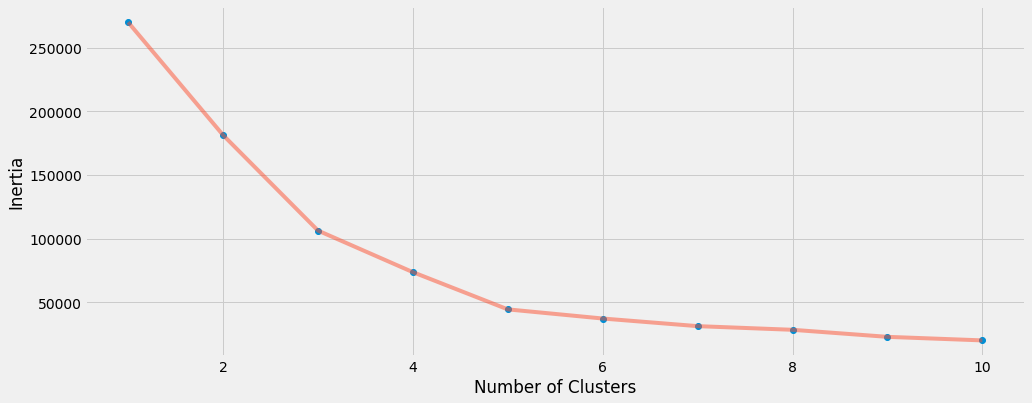

In [89]:
plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

In [90]:
algorithm = KMeans(n_clusters = 5, init = 'random')
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

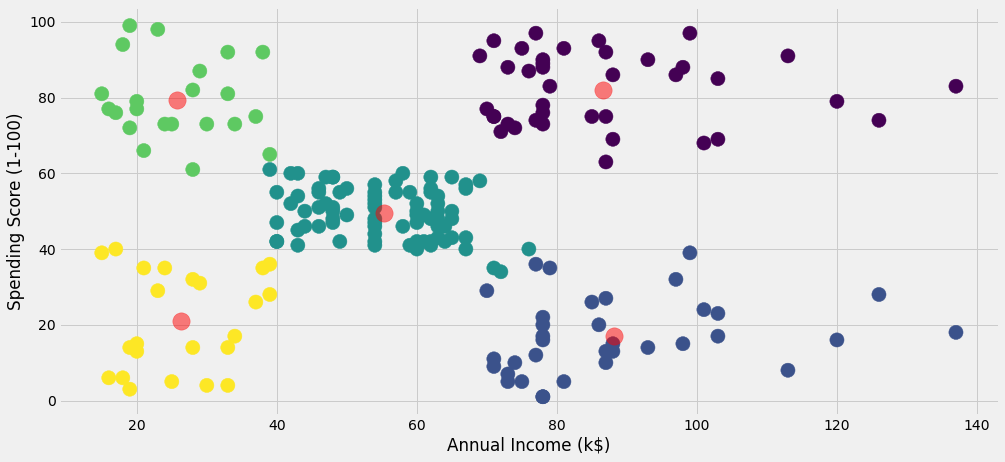

In [91]:

plt.figure(1, figsize = (15, 7))
plt.clf()
plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df, c = labels2, s = 200)
plt.scatter(x = centroids2[: , 0], y = centroids2[: , 1], s =300, c = 'red', alpha = 0.5)
plt.ylabel('Spending Score (1-100)'), plt.xlabel('Annual Income (k$)')
plt.show()

In [92]:
metrics.silhouette_score(X2, labels2, metric = 'euclidean')

0.553931997444648

<li>Tuổi, Thu nhập hằng năm và Số điểm mua sắm (thực hiện vẽ biểu đồ 3D để biểu diễn kết quả gom cụm).

In [93]:
X3 = df[['Age','Annual Income (k$)', 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1, 11):
    algorithm = KMeans(n_clusters = n, init = 'random')
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

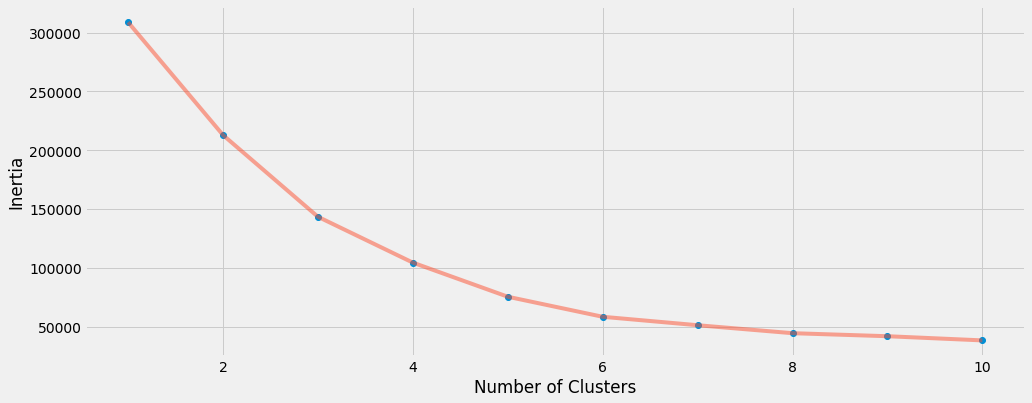

In [94]:
plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

In [95]:
algorithm = KMeans(n_clusters = 5, init = 'random')
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

<li>Thực hiện vẽ biểu đồ 3D, biểu diễn kết quả gom cụm Tuổi, Thu nhập hằng năm và Số điểm mua sắm.

In [96]:
df['label3'] = labels3
trace1 = go.Scatter3d(
    x = df['Age'],
    y = df['Spending Score (1-100)'],
    z = df['Annual Income (k$)'],
    mode = 'markers',
    marker = dict(
        color = df['label3'],
        size = 20,
        line = dict(
            color = df['label3'],
            width = 12
        ),
        opacity = 0.8
    )
)
dat = [trace1]
layout = go.Layout(
    title = 'Clusters',
    scene = dict(
        xaxis = dict(title = 'Age'),
        yaxis = dict(title = 'Spending Score'),
        zaxis = dict(title = 'Annual Income')
    )
)
fig = go.Figure(data = dat, layout = layout)
py.offline.iplot(fig)